In [1]:
options(warn = -1)
options(repr.plot.width=15, repr.plot.height=9) 
Sys.setlocale(category = "LC_ALL", locale = "ko_KR.UTF-8")

[1] "ko_KR.UTF-8/ko_KR.UTF-8/ko_KR.UTF-8/C/ko_KR.UTF-8/C"

In [2]:
library(e1071)
library(class)
library(rpart)
library(caret)
library(nnet)
library(dplyr)
library(stringr)
library(plotrix)
library(NbClust)
library(randomForest)

필요한 패키지를 로딩중입니다: ggplot2

필요한 패키지를 로딩중입니다: lattice


다음의 패키지를 부착합니다: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


다음의 패키지를 부착합니다: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin




In [3]:
polo <- read.csv("./file/polo.csv")

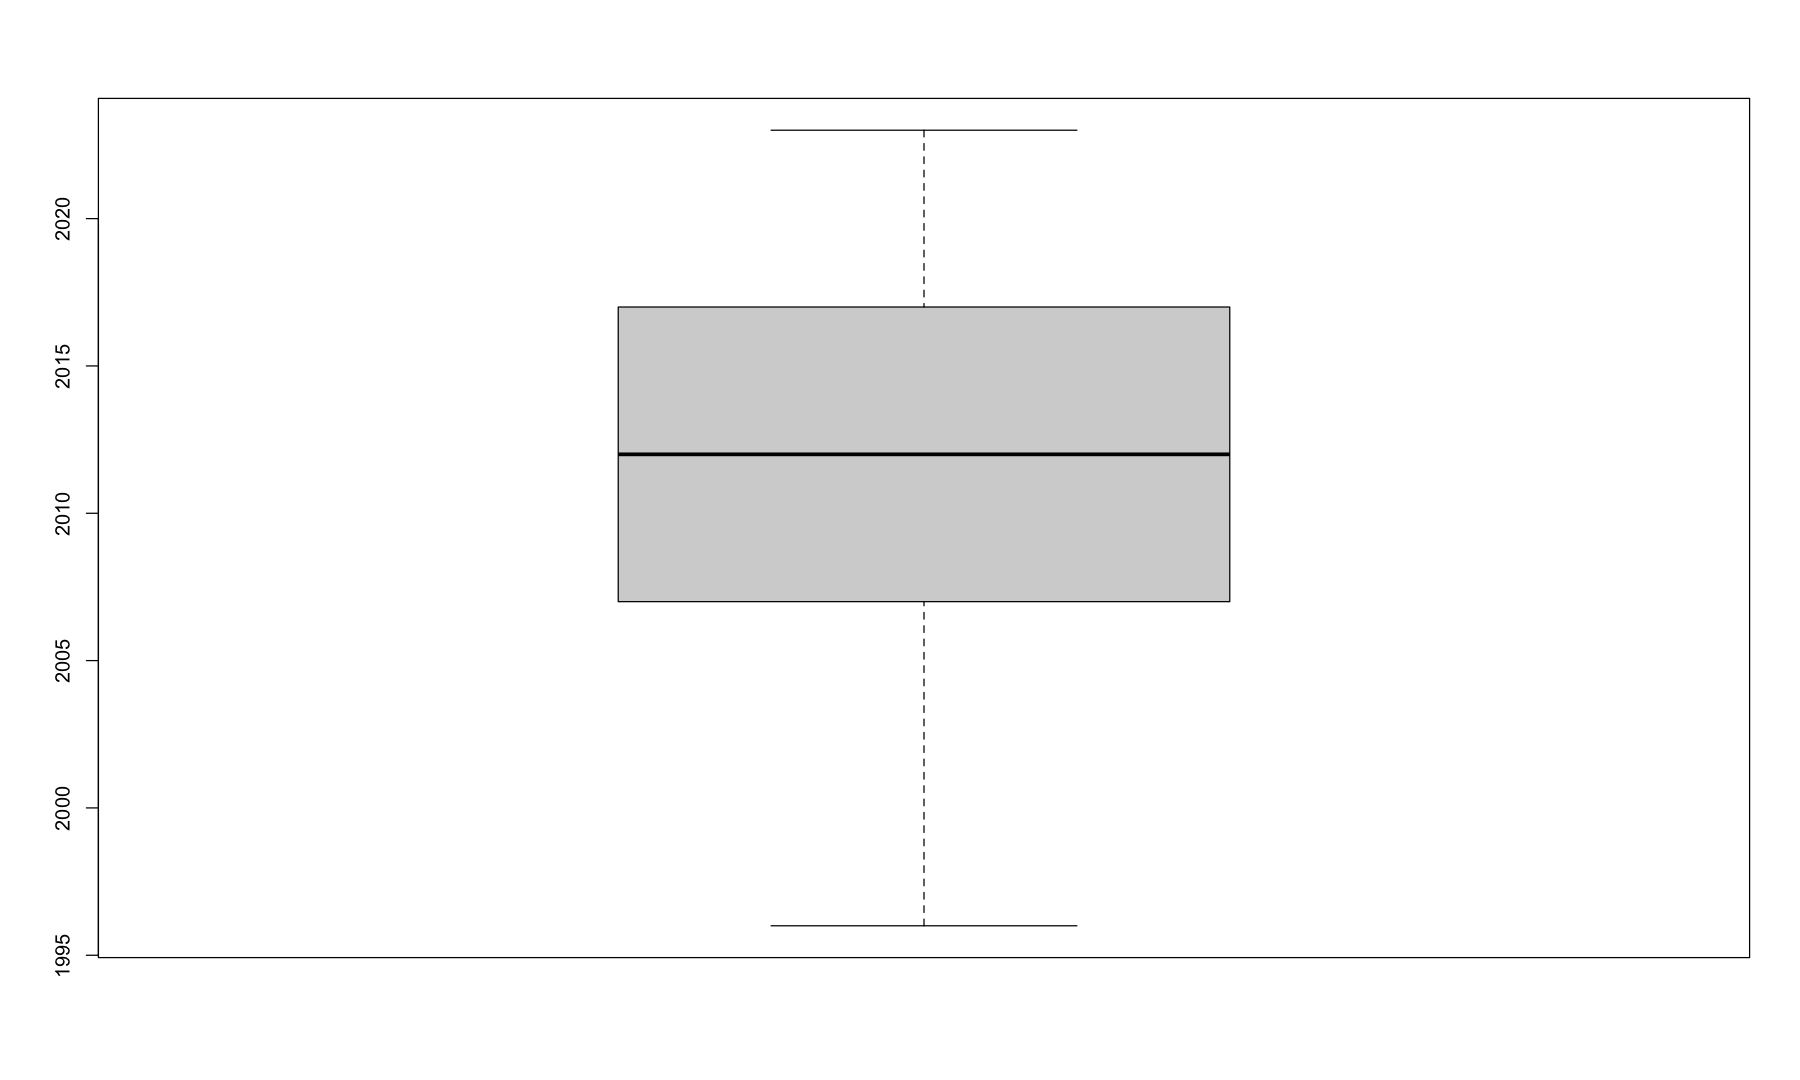

In [4]:
par(bg = 'white')
boxplot(polo$year)

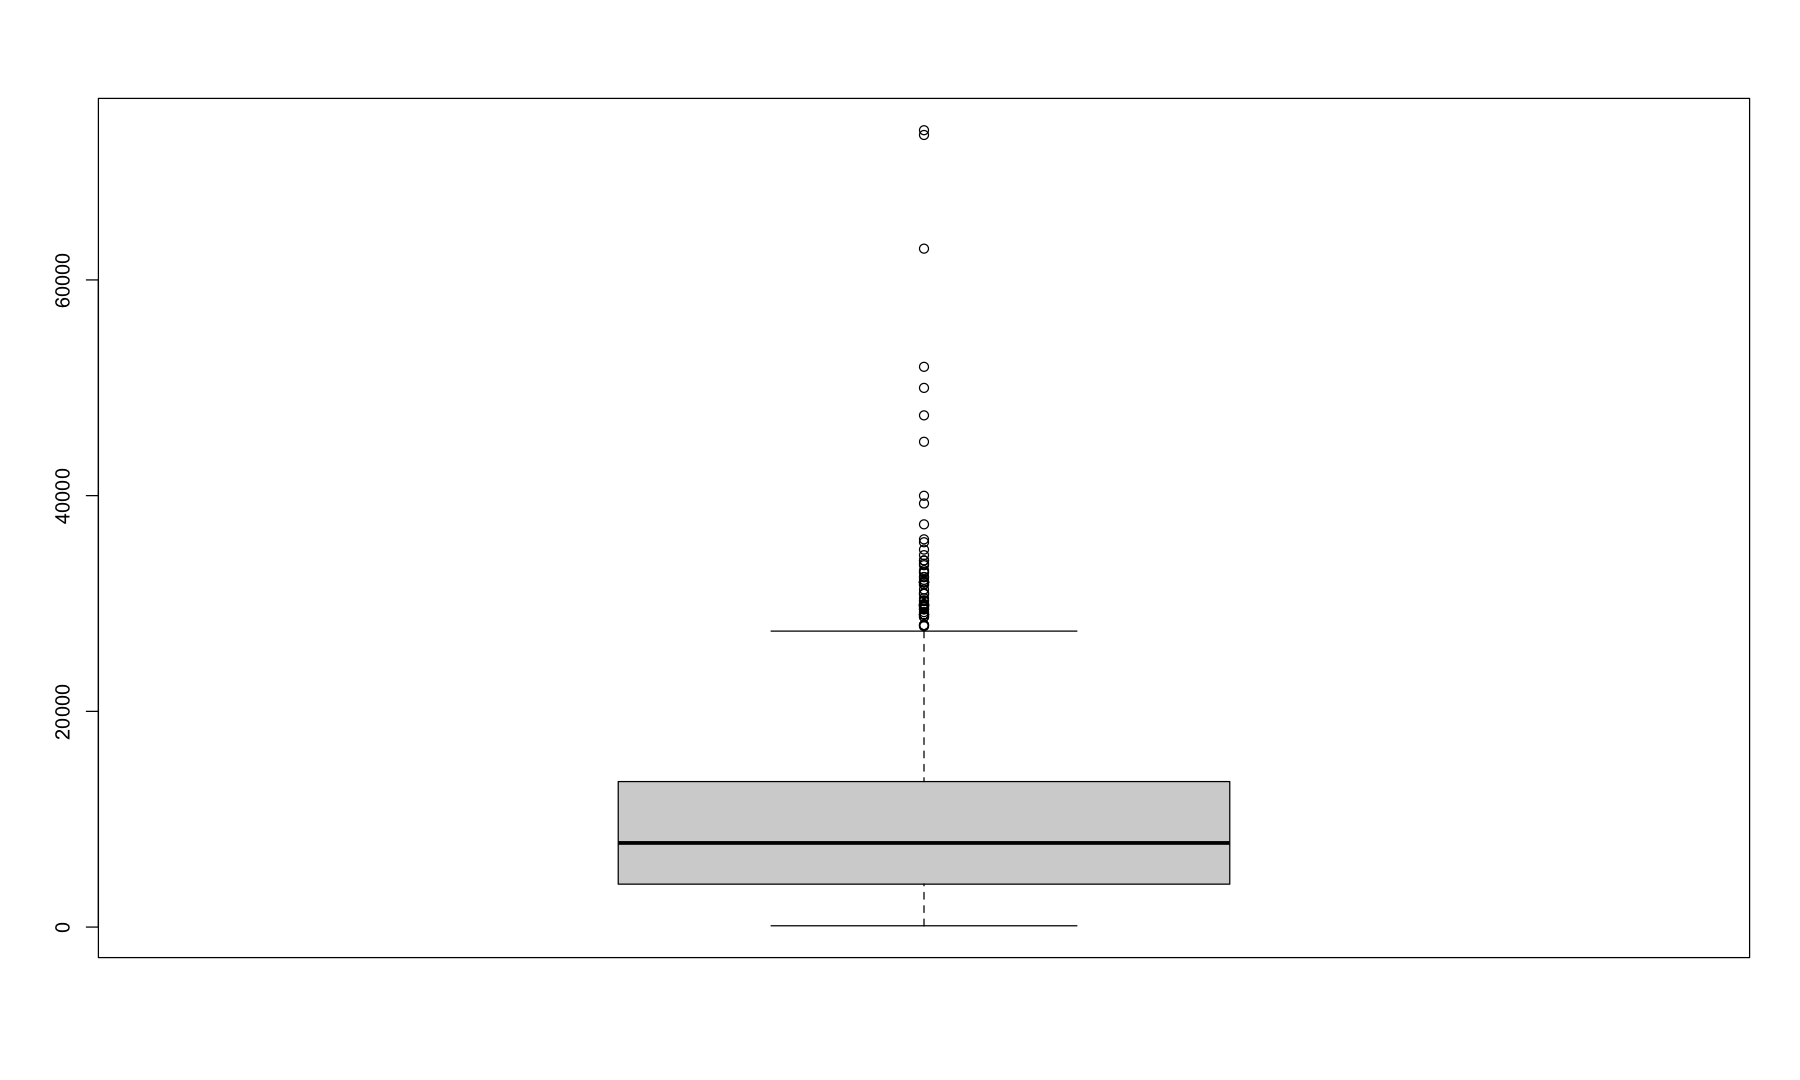

In [5]:
par(bg = 'white')
boxplot(polo$price_in_euro)

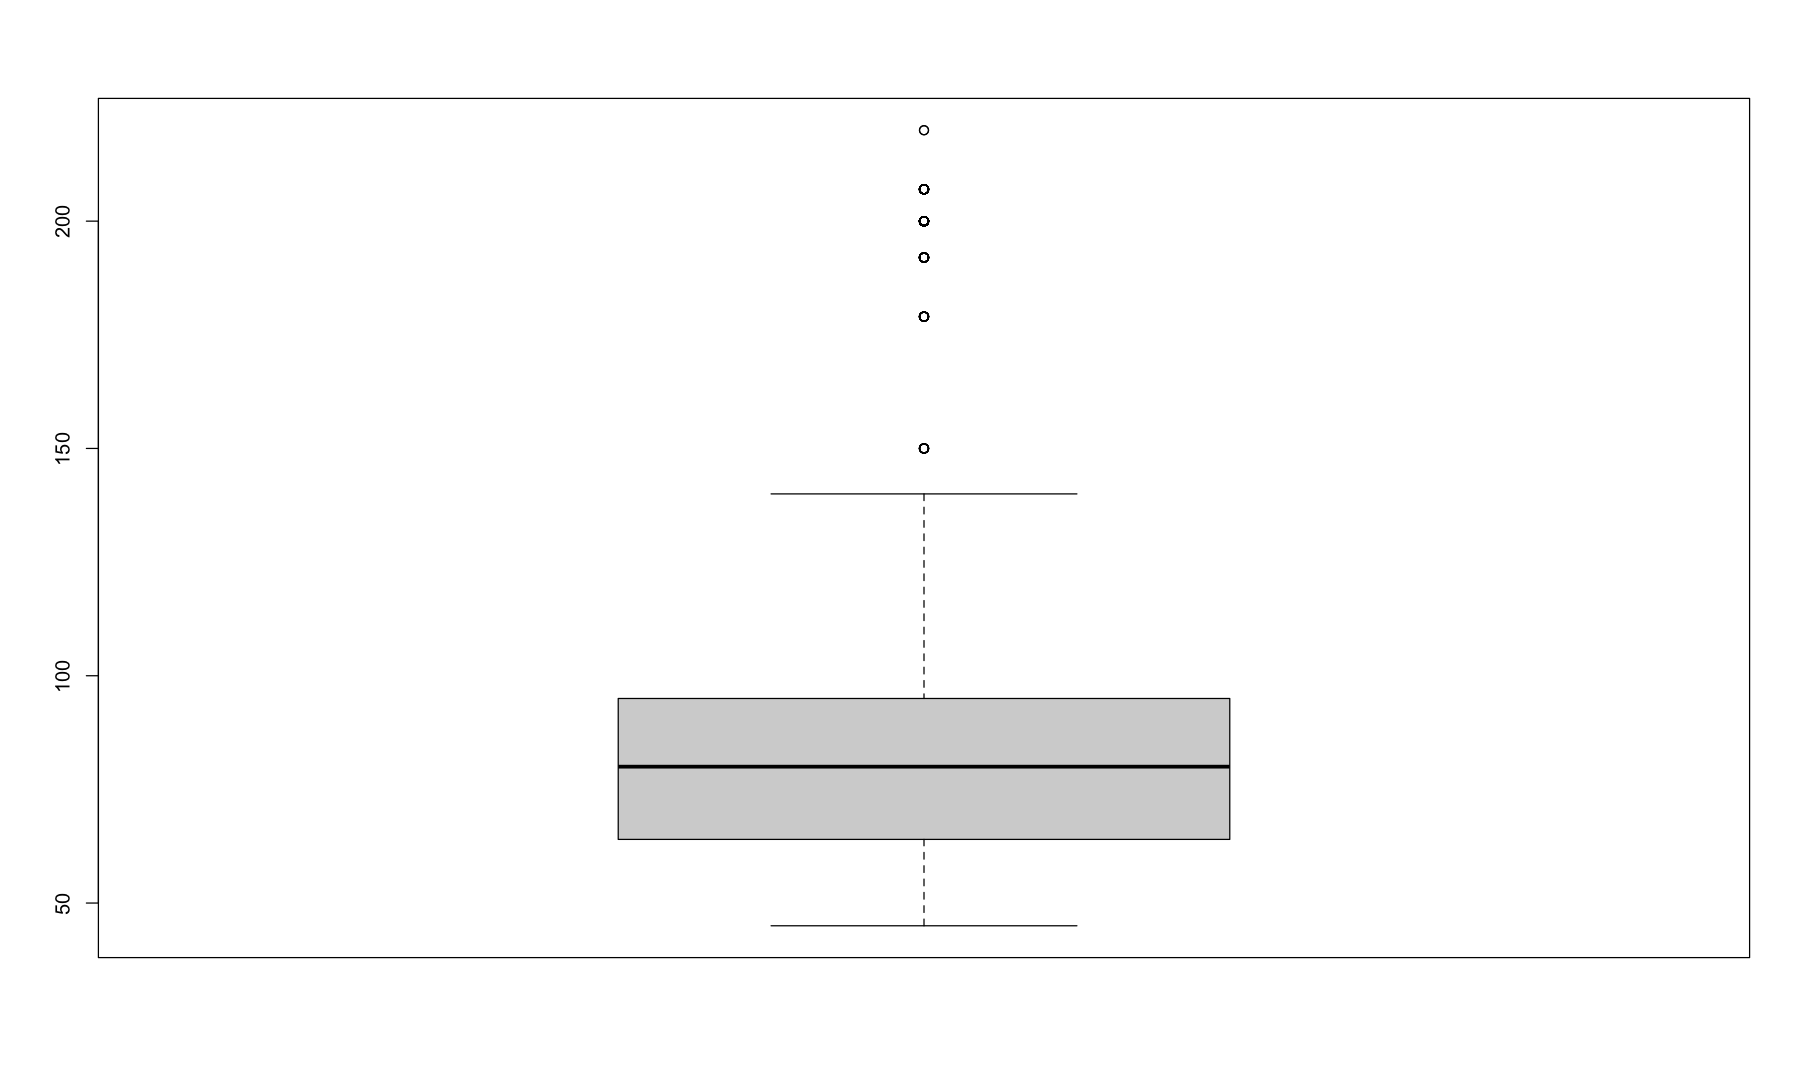

In [6]:
par(bg = 'white')
boxplot(polo$power_ps)

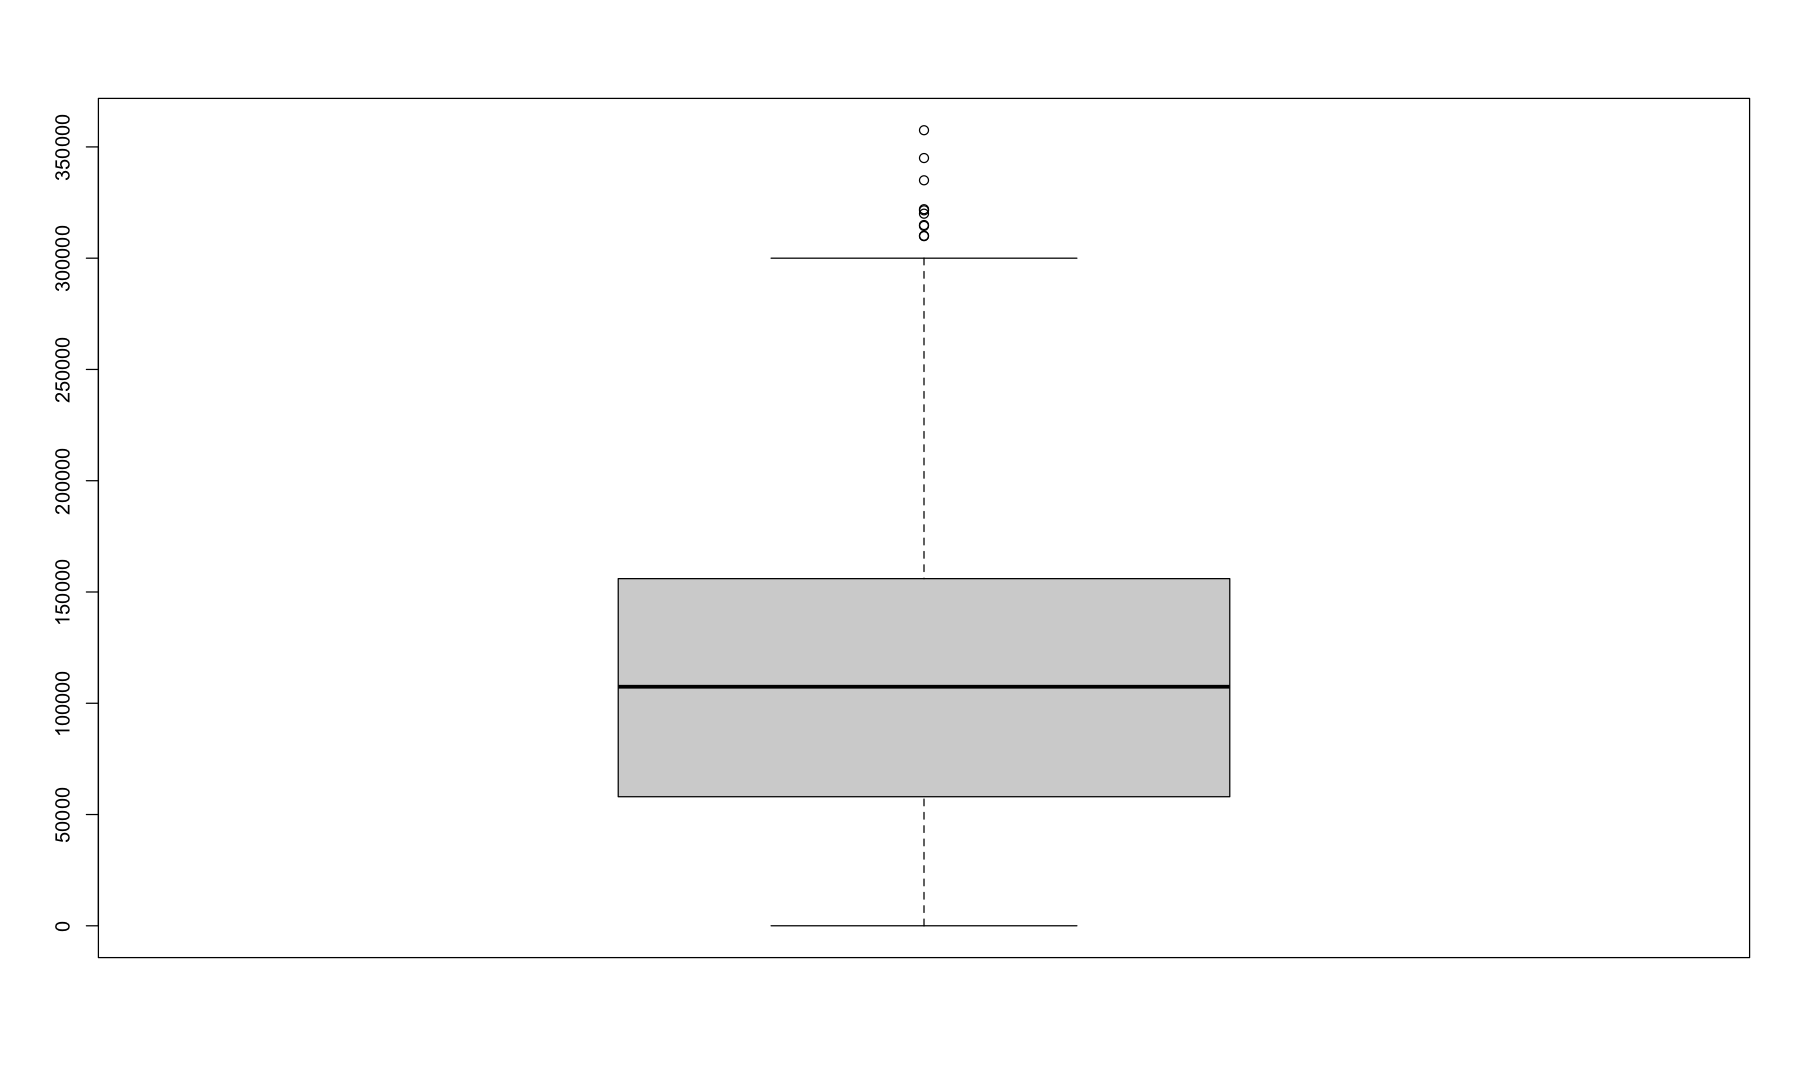

In [15]:
par(bg = 'white')
boxplot(polo$mileage_in_km)

In [29]:
table(polo$price_in_euro)


  120   260   299   300   399   400   490   499   500   550   555   600   630 
    1     1     1     2     1     1     1     2     5     3     1     4     1 
  650   690   698   700   729   750   790   800   850   875   890   899   900 
    3     1     1     4     1     5     2     3     3     1     1     1     2 
  930   950   980   990   999  1000  1050  1080  1100  1111  1150  1199  1200 
    1     2     2     7     9     3     3     1     6     1     4     1    12 
 1250  1280  1295  1299  1300  1390  1399  1400  1490  1500  1550  1599  1600 
    3     1     1     2     5     1     3     7     1    15     4     2     5 
 1649  1650  1699  1700  1749  1750  1790  1800  1850  1870  1890  1899  1900 
    1     3     1    11     1     3     3     8     4     2     4     2     8 
 1950  1985  1990  1996  1999  2000  2050  2090  2100  2150  2190  2199  2200 
    3     1     7     1    17    20     1     1     8     1     3     1    16 
 2210  2250  2290  2299  2300  2350  2399  2400  24

In [14]:
polo <- subset(polo, mileage_in_km != 468041)
polo <- subset(polo, mileage_in_km != 465000)
table(polo$mileage_in_km)


    10     11     12     15     20     25     30     50     95    100    150 
     6      1      1      1      1      1      2     15      1      2      1 
   200    500    608    610   1010   1012   1048   1100   1200   1211   1250 
     3      1      1      1      1      1      1      2      3      2      2 
  1264   1290   1500   1510   1550   1620   1750   1851   2000   2200   2490 
     1      2      3      1      1      1      1      1      5      1      1 
  2500   3000   3113   3500   3980   3993   4000   4324   4444   4450   4500 
     1      2      1      1      1      1      1      1      1      1      2 
  4898   4900   4999   5000   5361   5585   5600   6000   6841   6880   6900 
     1      8      1      6      1      2      1      1      1      1      1 
  7428   7500   7900   7995   8622   8890   9000   9200   9396   9900   9909 
     1      1      1      1      1      1      1      1      1      1      1 
  9990  10000  10267  10363  10376  10931  11267  11353  11485 

In [27]:
# 객관식 함수 모음
myTest <- function(A, dataName, coln, ntreecount, per) {
  result <- numeric(A) 
  result2 <- numeric(A) 
  result3 <- numeric(A) 

cat("------------------------------------\n")
cat("예측율\n")
# 라이브러리 받기
library(caret)
library(e1071)
library(nnet)
library(randomForest)
for(i in 1:A) {
sampA <- createDataPartition(dataName$price_in_euro, p = per, list = F)
# 학습용    
data.trA <- dataName[sampA,]
# 검증용
data.testA <- dataName[-sampA,]
# 문제
xA <- subset(data.testA, select = - price_in_euro)
# 답
yA <- data.testA$price_in_euro
# 문제풀기  ( 랜덤 포레스트)
rfA <- randomForest(price_in_euro ~ ., data=data.trA, ntree = ntreecount )
# ( SVM )
model <- svm(price_in_euro ~ ., data=data.trA)
# 인공신경망
#model.nnet <- nnet(price_in_euro ~ ., data=data.trA, size = 4) # size : 층 갯수 

# 예측
# 랜덤 포레스트
predA <- predict(rfA, xA)

# SVM
pred2A <- predict(model,xA)

# 인공 신경망
#pred3A <- predict(model.nnet,xA)

# 랜덤 포레스트


  mape <- 100 -(mean(abs((predA - yA) / yA)) * 100)
  mape2 <- 100 -(mean(abs((pred2A - yA) / yA)) * 100)
  #mape3 <- 100 -(mean(abs((pred3A - yA) / yA)) * 100)

 result[i] <- mape
 result2[i] <- mape2
 #result3[i] <- mape3

  cat(i, "번째 MAPE RandomForest:", round(mape, 2), "%\n")
  cat(i, "번째 MAPE SVM:", round(mape2, 2), "%\n")
  #cat(i, "번째 MAPE 인공:", round(mape3, 2), "%\n")
}

# SVM

cat("------------------------------------\n")
cat("평균 MAPE RandomForest:", round(mean(result), 2), "%\n")
cat("평균 MAPE SVM:", round(mean(result2), 2), "%\n")
#cat("평균 MAPE 인공:", round(mean(result3), 2), "%\n")
cat("------------------------------------\n")

}

In [22]:
#polo <- na.omit(polo)

In [30]:
myTest(A = 10, dataName = polo, coln = 5, ntreecount = 150,per = 0.7)

------------------------------------
예측율
# weights:  57
initial  value 272624488537.161407 
final  value 272620061904.000000 
converged
1 번째 MAPE RandomForest: 76.96 %
1 번째 MAPE SVM: 78.24 %
1 번째 MAPE 인공: 0.02 %
# weights:  57
initial  value 270879114100.083923 
final  value 270857657890.000000 
converged
2 번째 MAPE RandomForest: 75.01 %
2 번째 MAPE SVM: 77.03 %
2 번째 MAPE 인공: 0.02 %
# weights:  57
initial  value 281368739523.390869 
final  value 281344236328.000000 
converged
3 번째 MAPE RandomForest: 78.76 %
3 번째 MAPE SVM: 80.08 %
3 번째 MAPE 인공: 0.02 %
# weights:  57
initial  value 272640878469.273468 
final  value 272610712881.000000 
converged
4 번째 MAPE RandomForest: 77.91 %
4 번째 MAPE SVM: 79.69 %
4 번째 MAPE 인공: 0.02 %
# weights:  57
initial  value 271032219062.957886 
final  value 271008679467.000000 
converged
5 번째 MAPE RandomForest: 76.43 %
5 번째 MAPE SVM: 78.28 %
5 번째 MAPE 인공: 0.02 %
# weights:  57
initial  value 271245959953.359009 
final  value 271231389426.000000 
converged
6 번째 MAPE

In [31]:
model <- lm(price_in_euro ~ ., data=polo)
model


Call:
lm(formula = price_in_euro ~ ., data = polo)

Coefficients:
             (Intercept)                      year                  power_ps  
              -1.422e+06                 7.118e+02                 3.591e+01  
       transmission_type                 fuel_type  fuel_consumption_l_100km  
              -2.469e+03                -4.261e+02                 3.621e+02  
           mileage_in_km                color_blue              color_silver  
              -2.592e-02                 1.466e+02                -2.171e+02  
               color_red                color_grey               color_black  
              -5.321e+02                -1.016e+03                -3.752e+02  
             color_white  
                      NA  


In [32]:
summary(model)


Call:
lm(formula = price_in_euro ~ ., data = polo)

Residuals:
   Min     1Q Median     3Q    Max 
-12724  -1581   -475    748  50757 

Coefficients: (1 not defined because of singularities)
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)              -1.422e+06  4.522e+04 -31.448  < 2e-16 ***
year                      7.118e+02  2.229e+01  31.938  < 2e-16 ***
power_ps                  3.591e+01  2.915e+00  12.323  < 2e-16 ***
transmission_type        -2.469e+03  2.105e+02 -11.731  < 2e-16 ***
fuel_type                -4.261e+02  2.929e+02  -1.455 0.145805    
fuel_consumption_l_100km  3.621e+02  1.408e+02   2.571 0.010195 *  
mileage_in_km            -2.592e-02  1.514e-03 -17.125  < 2e-16 ***
color_blue                1.466e+02  2.656e+02   0.552 0.581029    
color_silver             -2.171e+02  2.586e+02  -0.839 0.401339    
color_red                -5.321e+02  2.645e+02  -2.012 0.044293 *  
color_grey               -1.016e+03  2.802e+02  -3.626 0.000

In [33]:
model


Call:
lm(formula = price_in_euro ~ ., data = polo)

Coefficients:
             (Intercept)                      year                  power_ps  
              -1.422e+06                 7.118e+02                 3.591e+01  
       transmission_type                 fuel_type  fuel_consumption_l_100km  
              -2.469e+03                -4.261e+02                 3.621e+02  
           mileage_in_km                color_blue              color_silver  
              -2.592e-02                 1.466e+02                -2.171e+02  
               color_red                color_grey               color_black  
              -5.321e+02                -1.016e+03                -3.752e+02  
             color_white  
                      NA  


In [35]:
write.csv(polo, file = "./file/polodata.csv", row.names = FALSE)


In [64]:
samp <- createDataPartition(polo$price_in_euro, p = 0.7, list = F)

data.tr <- polo[samp,]

data.test <- polo[-samp,]

x <- subset(data.test, select = - price_in_euro)

y <- data.test$price_in_euro

modelA <- svm(price_in_euro ~ ., data=data.tr)

In [40]:
saveRDS(modelA, "./rdsData/polo_ai.rds")

In [37]:
head(polo)

,year,price_in_euro,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,mileage_in_km,color_blue,color_silver,color_red,color_grey,color_black,color_white
,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1996,3990,60,1,1,6.3,27500,1,0,0,0,0,0
2,1996,299,60,1,1,6.3,202387,1,0,0,0,0,0
3,1996,1250,60,1,1,6.5,182500,1,0,0,0,0,0
4,1996,1400,60,1,1,6.3,257000,0,0,1,0,0,0
5,1997,1500,60,1,1,6.3,162730,1,0,0,0,0,0
6,1997,555,75,1,1,6.9,267293,1,0,0,0,0,0


In [52]:
ncol(polo)

[1] 13

In [72]:
preData <- predict(rds,
		data.frame(year=2019,
 			power_ps=61,
  			transmission_type=1,
   			fuel_type=0,
    		fuel_consumption_l_100km=7,
	 		mileage_in_km=164760, 
			color_blue=0,
	  		color_silver=0,
			color_red=0, 
	   		color_grey=0, 
	 		color_black=0,
	   		color_white=1
			)
		)

In [74]:
preData

1 
10571.55

In [70]:
real <- polo$price_in_euro

In [82]:
rmse <- sqrt(mean((preData - real)^2))

In [ ]:
		abs(preData - real)

In [83]:
rmse

[1] 7338.9

In [69]:
polo[2]

,price_in_euro
,<int>
1,3990
2,299
3,1250
4,1400
5,1500
6,555
7,1500
8,400
9,700


In [41]:
rds <- readRDS('/Library/Tomcat/webapps/ROOT/Flutter/Rserve/polo_ai.rds')

In [45]:
rds


Call:
svm(formula = price_in_euro ~ ., data = data.tr)


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.08333333 
    epsilon:  0.1 


Number of Support Vectors:  997


In [88]:
summary(rds)


Call:
svm(formula = price_in_euro ~ ., data = data.tr)


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.08333333 
    epsilon:  0.1 


Number of Support Vectors:  997






In [89]:
str(rds)

List of 32
 $ call           : language svm(formula = price_in_euro ~ ., data = data.tr)
 $ type           : num 3
 $ kernel         : num 2
 $ cost           : num 1
 $ degree         : num 3
 $ gamma          : num 0.0833
 $ coef0          : num 0
 $ nu             : num 0.5
 $ epsilon        : num 0.1
 $ sparse         : logi FALSE
 $ scaled         : logi [1:12] TRUE TRUE TRUE TRUE TRUE TRUE ...
 $ x.scale        :List of 2
  ..$ scaled:center: Named num [1:12] 2011.766 86.97 0.829 0.869 5.359 ...
  .. ..- attr(*, "names")= chr [1:12] "year" "power_ps" "transmission_type" "fuel_type" ...
  ..$ scaled:scale : Named num [1:12] 5.887 32.959 0.377 0.337 0.857 ...
  .. ..- attr(*, "names")= chr [1:12] "year" "power_ps" "transmission_type" "fuel_type" ...
 $ y.scale        :List of 2
  ..$ scaled:center: num 9540
  ..$ scaled:scale : num 7363
 $ nclasses       : int 2
 $ levels         : num [1:783] -1.11 -1.09 -1.22 -1.24 -1.2 ...
 $ tot.nSV        : int 997
 $ nSV            : int [1:2

In [92]:
predicted <- rds$fitted
actual <- polo$price_in_euro

error <- mean(abs(predicted - actual))

In [100]:
mean(abs(rds$residuals))

[1] 1277.441

In [98]:
length(predicted)
length(actual)


[1] 1896

[1] 2708

[1] 9145.912

In [93]:
error

[1] 6729.381

In [90]:
rds$fitted

4          5          6          7          8          9         10 
  664.3329  1070.9190  1251.9181  1694.8563  1033.7971  1524.3561  1734.5073 
        12         13         14         15         16         17         18 
 1618.9609  2037.8930  1486.3591  1527.5857  2175.8325  1667.0232  1465.6493 
        19         20         22         23         24         25         26 
 1236.8426  1417.8149  1127.0833  1373.6633  1527.6933  3976.9129  2056.1488 
        27         28         29         30         31         32         34 
 1489.0916  3470.7130  2078.5344  1929.4940  1256.1838   873.3675   985.1177 
        38         39         40         41         42         43         45 
 1859.1540  1182.6793  1843.4761  2287.4660  1231.4866  1733.7655  1216.4950 
        46         51         52         53         54         56         57 
 1435.9785   944.9914  1894.3337  1933.9275  1233.8565  1399.8841  1381.2344 
        59         60         61         62         63         66         68 
 2924.7170  1226.2681  1351.4215  1998.5864  1916.3498  2384.0472  4649.9989 
        73         74         76         78         79         80         81 
 4251.9517  1258.8621  1413.4240  2518.5698  3968.5909  1779.1266  1423.7664 
        82         83         85         87         89         90         91 
 1333.8417  1350.6890  1512.9441  1536.2274  1735.7132  1954.2008  2263.8899 
        92         93         97         98         99        101        102 
 2677.6793  1902.2835  1715.8723  1114.8706  1852.0690  3383.7382  3262.4528 
       105        107        108        109        110        112        115 
 1276.7167  1241.2160  2429.2809  2594.4223  1427.6960  1259.2909  1321.5972 
       116        117        118        120        121        122        123 
 1609.2243  2732.9754   836.0051  2155.2023  1862.7032  1307.3268  1584.7196 
       124        125        126        127        128        129        130 
 1754.7883  1355.6299  1423.5458  1680.7782  1307.4680  1131.8829  1965.2304 
       131        133        134        136        140        141        142 
 4011.1535  3163.5881  2612.8309  3686.6272  4695.0351  1450.7673  4017.7785 
       143        144        145        146        148        149        150 
 1355.4907  1286.8499  5342.5856  2237.6819  3126.7173  1229.0074  1370.9168 
       151        152        153        158        159        160        162 
 2356.4835  1606.5578  1937.3763  1214.8951  1600.4305  1600.4305  3246.7701 
       166        167        168        169        171        172        173 
 2187.8834  2396.0717  2116.7420  1438.0584  1336.1664  2805.4914  2048.8871 
       174        176        177        178        179        180        181 
 1643.7032  2220.5447  2460.0325  2538.1261  2950.4079  2163.7251  1213.6956 
       183        184        188        189        191        192        193 
 2948.7738  1752.3814  2011.2325  2610.6203  2981.0261  4342.6594  1975.8785 
       194        197        198        199        200        201        203 
 1882.3185  1881.2210  1672.4526  2327.1804  1747.2766  2441.8772  1070.1392 
       204        205        207        208        210        211        212 
 2770.9747  1895.9089  1873.2412  1773.4328  1762.3658  1886.1448  2188.9530 
       215        216        218        219        220        222        223 
 1854.1262  1887.6216  3427.2681  1482.5710  2249.7754  1842.8145  1665.2691 
       226        227        230        231        232        233        235 
 2235.0635  2102.0045  1710.5243  2254.4438  2430.8156  1133.6419  1127.0867 
       236        237        238        239        240        241        244 
 3455.5902  1598.6720  1656.7069  2020.1372  1595.1963  1368.0560  2024.0723 
       245        249        250        251        252        254        255 
 1561.2389  1826.8235  2991.4224  2458.4147  1502.6366  2228.2112  3587.9170 
       256        257        259        260        261        262        264 
 2214.9090  2622.9352  2458.414

In [46]:
predict(rds,
	list(	year=2018,
 			power_ps=" + power_ps + ",
  			transmission_type=" + transmission_type + ",
   			fuel_type=" + fuel_type + ",
    		fuel_consumption_l_100km=" + fuel_consumption_l_100km + ",
	 		mileage_in_km=" + mileage_in_km + ", 
	 		color_black=" + color_black + ",
	  		color_silver=" + color_silver + ",
	   		color_grey=" + color_grey + ", 
	   		color_white=" + color_white +" 
			)
		)
		

ERROR: Error in 1:nrow(newdata): 인자의 길이가 0입니다.


In [48]:
rds


Call:
svm(formula = price_in_euro ~ ., data = data.tr)


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.08333333 
    epsilon:  0.1 


Number of Support Vectors:  997


ERROR: Error in gzfile(file, "rb"): 커넥션을 열 수 없습니다


In [53]:
head(polo)

,year,price_in_euro,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,mileage_in_km,color_blue,color_silver,color_red,color_grey,color_black,color_white
,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1996,3990,60,1,1,6.3,27500,1,0,0,0,0,0
2,1996,299,60,1,1,6.3,202387,1,0,0,0,0,0
3,1996,1250,60,1,1,6.5,182500,1,0,0,0,0,0
4,1996,1400,60,1,1,6.3,257000,0,0,1,0,0,0
5,1997,1500,60,1,1,6.3,162730,1,0,0,0,0,0
6,1997,555,75,1,1,6.9,267293,1,0,0,0,0,0


In [65]:
predict(rds,
		data.frame(year=2018,
 			power_ps=60,
  			transmission_type=1,
   			fuel_type=0,
    		fuel_consumption_l_100km=7,
	 		mileage_in_km=164710, 
			color_blue=0,
	  		color_silver=0,
			color_red=0, 
	   		color_grey=0, 
	 		color_black=0,
	   		color_white=1
			)
		)


1 
10241.18

In [68]:
result <- predict(rds, data.frame(year=2016, power_ps=65 
                 , transmission_type=1, fuel_type=2 
                 , fuel_consumption_l_100km=6.4
                 , mileage_in_km=30000, color_blue=0, color_black=1 
                 , color_silver=0,color_red=0, color_grey=0, color_white=1,
                    ))

ERROR: Error in data.frame(year = 2016, power_ps = 65, transmission_type = 1, : 기본값이 없는 인수가 누락되어 있습니다


In [59]:
list(	year=2018,
 			power_ps=60,
  			transmission_type=1,
   			fuel_type=0,
    		fuel_consumption_l_100km=7,
	 		mileage_in_km=164710, 
			color_blue=0,
	  		color_silver=0,
			color_red=0, 
	   		color_grey=0, 
	 		color_black=0,
	   		color_white=1
			)

$year
[1] 2018

$power_ps
[1] 60

$transmission_type
[1] 1

$fuel_type
[1] 0

$fuel_consumption_l_100km
[1] 7

$mileage_in_km
[1] 164710

$color_blue
[1] 0

$color_silver
[1] 0

$color_red
[1] 0

$color_grey
[1] 0

$color_black
[1] 0

$color_white
[1] 1